# What is spectral leakage?

**Topic:**
- DFT Window length signal waveform periods
- Spectral leakage

**Learning objectives:**
- Understand the cause of spectral leakage
- Understand the significance of window length for the calculated Discrete Fourier Transform

**Libraries and notebook config:**

In [1]:
from numpy import sin, cos, pi, exp, empty, mean, absolute, angle # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import scipy.signal as sig                  # Importerer signalbehandlingsmodulen til scipy
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"

%matplotlib ipympl

## Introduction

In exercise 4, we worked with the Discrete Fourier Transform (DFT) from a theoretical standpoint and explored how each element in a DFT (along with its complex conjugate mirror image) represents exactly one sinusoidal sequence in the time domain. Unfortunately, this is true *only* for sinusoidal sequences that are periodic over the same number of samples $N$ as are input into the Fourier transform. The size of the signal input into a DFT is known as the **window length**.

In practical contexts where frequency analysis of an unknown signal is performed, it is almost guaranteed that the signal is *not* periodic over the window length, resulting in a phenomenon kown as **spectral leakage**. In this case, the Fourier Transform will produce the component sinusoids of a signal that *is* periodic over $N$ samples, where $N$ is the window length. The effect of this becomes quite apparent if one attempts to reconstruct a continuous-time signal from the information in a DFT (that is, if we treat the DFT as a fourier series).

>### Example: Reconstructed Sine Wave
>
>The signal $ x(t) = \cos \left( 2\pi \cdot 1.6 \cdot t \right) $ is sampled with a sampling frequency $ f_s = 16 $, to produce the digital signal $ x[n] = \cos \left( \frac{\pi}{5} \cdot n \right) $. A window of $N=16$ samples, corresponding to $T = \frac{N}{f_s} = \frac{16}{16} = 1 $ second, is used to calculate the DFT of the signal. What one ends up with is the composition of a new signal $ y(t) $, which **is** periodic over the window length (i.e., one second) and only matches the correct values at the 16 sampling points used.
>
>![](Figurer/SpektralLekkasje.png)
>
>In other words, computing a 16-point DFT can be viewed as "finding a way to represent exactly these 16 selected samples using only sinusoidal sequences that are periodic over 16 samples." Consequently, the resulting composite signal will also be periodic over 16 samples. More generally, this means that an $ N $-point DFT of a real-valued signal decomposes the signal segment into a series of sinusoidal sequences with normalized angular frequencies $ \hat{\omega}_m = 2\pi \frac{m}{N}, \ \ \ m \in \{0, 1, 2, \ldots N/2\} $.

The result, when calculating the DFT of a sinusoid with $ \hat{\omega} \notin \hat{\omega}_m $, is a representation of the sinusoidal sequence $ x[n] $ in the frequency domain that is spread over a wider range of frequency components since none of the components the DFT is "allowed" to use has the same frequency as the sinusoidal sequence $x[n]$. <!--The figure below shows the frequency content as it appears based on $ |X[m]|$, calculated using a 16-point DFT, compared to the *actual* frequency content of $x(t)$.--> Running the code cell below will load an interactive demo which shows the behavior of spectral leakage for adjustable combinations of DFT length and wave frequencies. 


Output()

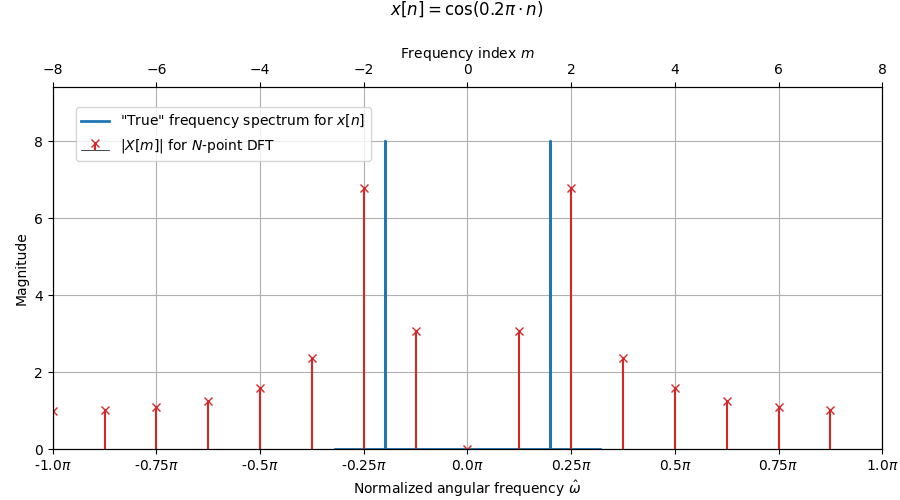

In [2]:
from demos import SpectralLeakageDemo
%matplotlib ipympl
SpectralLeakageDemo(figsize=(9,5));



The demo illustrates that the frequency content of the sine wave cannot be represented by any of the specific frequencies that the DFT sequence is composed of. This results in the distribution of the signal across the 16 available frequency components, and this phenomenon is called spectral leakage.

The code cell below shows an example of program code that generates $N=16 $ samples of the signal $ x[n] $, calculates the DFT sequence $ X[m] $ based on the 16 samples, and displays the result in a stem plot.
<!--Running the code cell below will load an interactive demo which shows the behavior of spectral leakage for various DFT lengths and wave frequencies. -->


<!--## Introduksjon

I dataøving 3 arbeidet vi med Diskrét Fouriertransformasjon fra et teoretisk ståsted, og utforsket hvordan hvert element i en DFT (sammen med en komplekskonjugert "tvilling") representerer nøyaktig én sinussekvens i tidsdomenet. Dessverre gjelder dette *kun* for sinussekvenser med den egenskapen at de er periodisk over samme antall sampler $N$ som går inn i fouriertransformasjonen, noe vi kaller **vinduslengden**. 

I praktiske sammenhenger der frekvensanalyse av et ukjent signal skal utføres kan man nesten garantere at signalet *ikke* er periodisk over vinduslengden, og det oppstår noe som kalles **spektral lekkasje**. I dette tilfellet vil fouriertransformasjon gi sinusbølge-komponentene til et signal som *er* periodisk med vinduslengden. Effekten av dette gjør seg selv svært synlig dersom man prøver å rekonstruere et tidskontinuerlig signal fra en DFT.

### Eksempel: rekonstruert sinusbølge.

Signalet $x(t) = \cos \left( 2\pi \cdot 1.6 \cdot t \right)$ samples med en samplingsfrekvens $f_s = 16$, noe som gir signalet $x[n] = \cos \left( \frac{\pi}{5} \cdot n \right)$. Et utsnitt på $N=16$ sampler, tilsvarende $\frac{N}{f_s} = \frac{16}{16} = 1$ sekund, benyttes til å fouriertransformere signalet. Det man ender opp med er komposisjonen til et nytt signal $y(t)$ som **er** periodisk over vinduslengden (altså ett sekund), og kun har riktig verdi akkurat i de 16 samplingstidspunktene som er brukt.

![](Figurer/SpektralLekkasje.png)

Å beregne en 16-punkts DFT kan med andre ord betraktes som å "finne en måte å gjengi akkurat disse 16 utvalgte samplene, kun med bruk av sinussekvenser som er periodiske over 16 sampler". Det følger dermed at det resulterende sammensatte signalet også vil være periodisk over 16 sampler. Mer generelt betyr det at en $N$-punkts DFT dekomponerer et signalutklipp i en rekke sinussekvenser med normalisert vinkelfrekvens $\hat{\omega}_m = 2\pi \frac{m}{N}, \ \ \ m \in \{0, 1, 2, \ldots N/2\}$.  

Resultatet av dette er en representasjon av sinussekvensen $x[n]$ i frekvensplanet som er fordelt utover et større antall frekvenskomponenter, da ingen av komponentene man har "lov" til å bruke har samme frekvens som sinussekvensen $x[n]$. Figuren nedenfor viser frekvensinnholdet slik det framstår ut ifra $|X[m]|$ utregnet med 16-punkts DFT, representert sammen med det reelle frekvensinnholdet til $x(t)$. 

![](Figurer/SpektralLekkasje2.png)

Det figuren illustrerer er at frekvensinnholdet til sinusbølgen ikke kan representeres med noen av de spesifikke frekvensene DFT-sekvensen er sammensatt av. Dermed oppstår en fordeling av signalet utover de 16 tilgjengelige frekvenskomponentene, og det er dette som kalles spektral lekkasje.

Kodecellen nedenfor viser et eksempel på programkode som genererer $N=16$ sampler av signalet $x[n]$, regner ut DFT-sekvensen $X[m]$ basert på de 16 samplene, og viser resultatet i et stolpediagram.-->

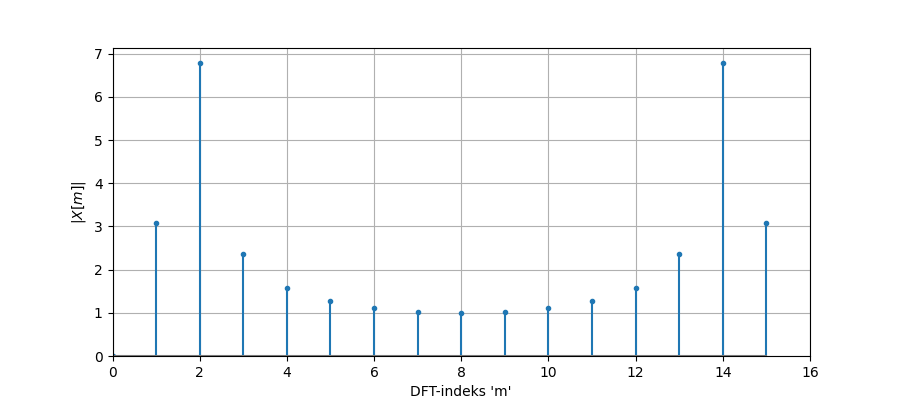

In [3]:
# Lukk evt. eksisterende figur 1 og lag en ny figur 1.
# Dette for å unngå akkumulering av figurer i bakgrunnen som tar opp minne.
plt.close(2) 
plt.figure(2, figsize=(9, 4))

# Parametre
N = 16      # Antall sampler av sinusbølge i DFT
f_0 = 1.6   # Frekvens sinusbølge i Hz
f_s = 16    # Samplingsfrekvens

# Utregning av sinussekvens og kalkulasjon av DFT
n = np.arange(N)
x_n = cos(2*pi*f_0/f_s*n)
X_m = fft(x_n)

# Funksjonen "stem()" brukes til å lage et stolpediagram av DFT-sekvensens absoluttverdi |X[m]|
# Påfølgende linjer utfører tilpasninger av figuren
plt.stem(n, # Samplenummer (heltall fom. 0 tom. 15)
         np.absolute(X_m),   # DFT-sekvensens absoluttverdi |X[m]|
         linefmt='-',        # Linjestil stolper
         markerfmt='.',      # Punktstil for stem-markere. Default er 'o' (stor prikk)
         basefmt='grey'      # Farge på y=0 aksen
         )
plt.xlabel("DFT-indeks 'm'") # Merknad på x-aksen
plt.ylabel(r"$|X[m]|$")      # Merknad på y-aksen
plt.xlim([0, N])             # Grenseverdier i x-retning
plt.ylim(ymin=0)             # y-aksen starter i y=0
plt.grid(True)               # Aktiver rutenett 

## Task:

In this task we will focus on analyzing a signal $ x(t) $ consisting of two sinusoidal components:

$$ x(t) = 2\cos\left(19\pi\cdot t + \frac{\pi}{3}\right) + \cos\left(23\pi \cdot t \right) $$

The signal is sampled with a sampling frequency $ f_s = 80 $ Hz to produce the signal $ x[n] $.

## a)
* Write code that generates $ N=32 $ samples of the signal $x[n]$, and calculate the $32$-point DFT $X[m]$. Create a stem plot which shows the magnitude spectrum $|X[m]|$ in linear scale.
* Assuing no prior knowledge of the signal $x(t)$, what assupmtions would you be tempted to make about the number of component sinusoids in the signal based on the DFT?

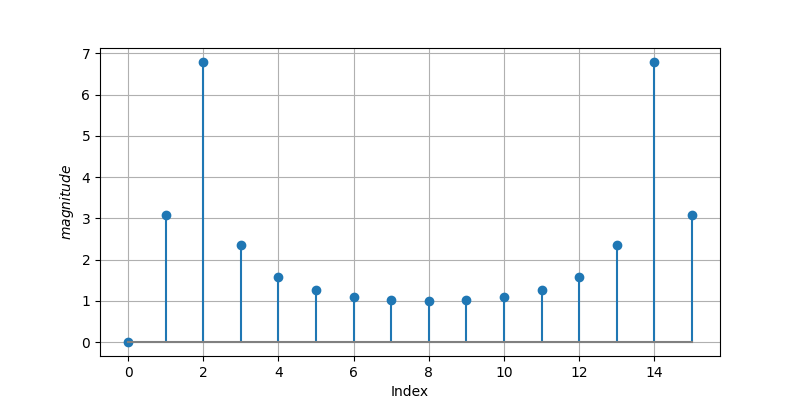

In [16]:
# WRITE YOUR CODE IN THIS CELL:
import numpy as np
from math import pi
import matplotlib.pyplot as plt 

# Define parameters
N = 32                  # Number of samples
fs = 80                
n = np.arange(N)     



#  Continous time signal :
#xt =2*np.cos(2*pi*t + pi/3) + np.cos(23*pi*t)

#  The discrete signal:
xn = 2 * np.cos(19*pi*n/fs + pi / 3) + np.cos((23*pi*n)/ fs)
Xm = np.fft.fft(xn)

# Plot the magnitude spectrum |X[m]|
plt.figure(figsize=(8, 4))
plt.stem(np.abs(X_m), linefmt='-', markerfmt='o', basefmt='grey')
#plt.stem(np.arange(N),np.abs(X_m), linefmt='-', markerfmt='o', basefmt='grey')
plt.xlabel("Index")
plt.ylabel(r"$magnitude$")
plt.grid(True)
plt.show()


ANSWER THEORY QUESTIONS HERE:

## b)

Copy the code from **a)**, and make changes so the figure now shows a standard two-sided magnitude spectrum, with the units along the x-axis denoting frequency $f$ in Hz (and not frequency index $m$). It is expected that you are able to convert index $m$ to frequency $f$ using simple mathematical operations.

*Hint: the function `numpy.fft.fftshift` should come in handy for creating a "normal" two-sided spectrum.*

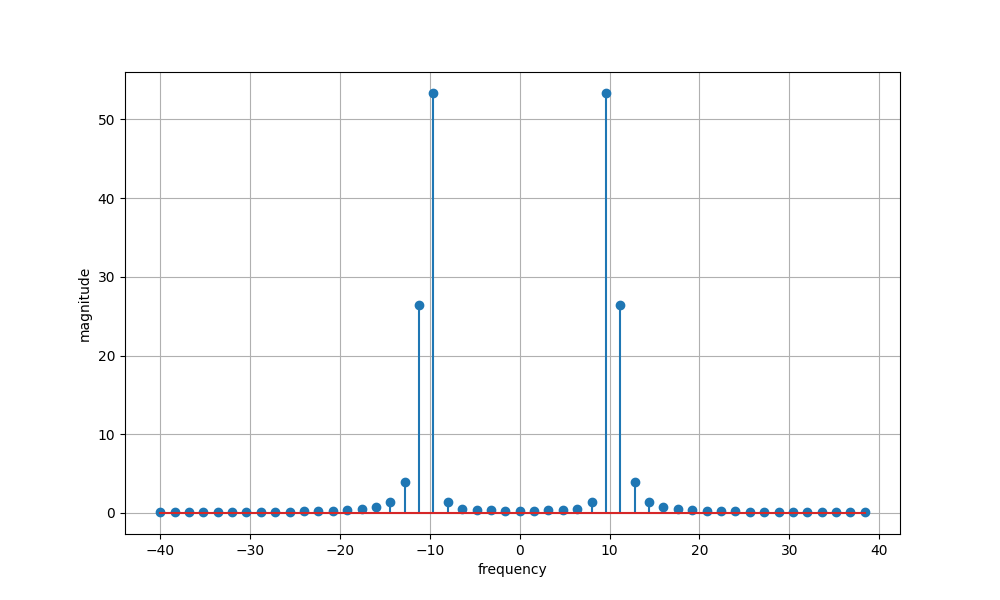

In [15]:
# WRITE YOUR CODE IN THIS CELL:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button





#Importing slider:
#https://www.geeksforgeeks.org/matplotlib-slider-widget/
#https://stackoverflow.com/questions/31013713/how-can-i-incorporate-a-slider-into-my-plot-to-manipulate-a-variable


N = 50
n = np.arange(N)
fs = 80
t = np.arange(N) / fs



#x = 2 * np.cos(19 * np.pi * t + np.pi/3) + np.cos(23 * np.pi * t)


#DIscrete signal
xn = 2 * np.cos(19*pi*n/fs + pi / 3) + np.cos((23*pi*n)/ fs)

mag = np.abs(np.fft.fft(xn))

freq = np.fft.fftfreq(N, 1/fs)


#https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
#Shift the zero-frequency component to the center of the spectrum.
#This function swaps half-spaces for all axes listed (defaults to all). Note that y[0] is the Nyquist component only if len(x) is even.

magShifted = np.fft.fftshift(mag)



freqShifted = np.fft.fftshift(freq)

#fig, ax = plt.subplots()
plt.figure(figsize=(10, 6))
plt.stem(freqShifted, magShifted)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.grid(True)
plt.show()

[]

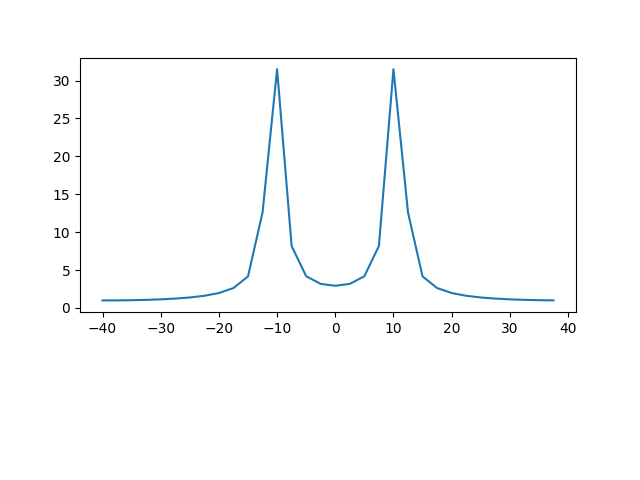

In [17]:

#Source:
#For testing out slider for N
#https://www.geeksforgeeks.org/matplotlib-slider-widget/

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
 
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)
 
N = 32
fs = 80
t = np.arange(N) / fs


xn = 2 * np.cos(19 * np.pi * t + np.pi/3) + np.cos(23 * np.pi * t)
Xn = np.fft.fft(xn)
mag = np.abs(Xn)

freq = np.fft.fftfreq(N, 1/fs)


#https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
#Shift the zero-frequency component to the center of the spectrum.
#This function swaps half-spaces for all axes listed (defaults to all). Note that y[0] is the Nyquist component only if len(x) is even.

def getxn(fs,N):
    t = np.arange(N) / fs
    return 2 * np.cos(19 * np.pi * t + np.pi/3) + np.cos(23 * np.pi * t)
    


def getYdata(fs,N):
    return np.fft.fftshift(np.abs(np.fft.fft(getxn(fs,N))))
    
    
def getXdata(N, fs):
    return np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    

magShifted = np.fft.fftshift(mag)



freqShifted = np.fft.fftshift(freq)

l, = plt.plot(freqShifted, magShifted)
 
# Create axes for frequency and amplitude sliders
#axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
axN = plt.axes([-60.0, 0.0, 40.0, 60.0])
 
# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
#freq = Slider(axfreq, 'Frequency', 0.0, 20.0, 3)
 
# Create a slider from 0.0 to 10.0 in axes axfreq
# with 5 as initial value and valsteps of 1.0

initalValue = 30.0
minValue = 20.0
maxValue = 50.0
sliderName = 'N'

windowSize = Slider(ax=axN,label='N', valmin=minValue,
                   valmax=maxValue, valinit=initalValue, valstep=1.0)
 

 
def update(val):
    #f = freq.val
    N = windowSize.val
    l.set_ydata(getYdata(fs,N))
    l.set_xdata(getXdata(N, fs))
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()
 
#updating
#freq.on_changed(update)
windowSize.on_changed(update)
plt.plot()

*PS: [Here](Figurer/task1b_sol.png) is an example of what the plot for task **b)** may look like.*

## c) 
Do some experimentation with different window sizes $N$. Approximately how large does the window have to be before the two component sinusoids are shown unambiguously as two separate "spikes"? <br>
*PS: You do not need to calculate the answer based some complex theoretical calculation, simple trial and error along with graphical interpretation is sufficient*

ANSWER THEORY QUESTIONS HERE:
About 60